## Ques2: Implement Linear Regression on USA Housing Dataset using
- (i) sklearn in-built function
- (ii) CuML in-built function
## Compare time taken in each case

## ans - sklearn taking less time

## SK-learn

In [1]:
%%time
import numpy as np
import pandas as pd
import missingno as msn
import seaborn as sns

CPU times: user 441 ms, sys: 64.7 ms, total: 506 ms
Wall time: 505 ms


In [2]:
%%time
df = pd.read_csv('USA_Housing.csv')
df

CPU times: user 5.35 ms, sys: 256 µs, total: 5.61 ms
Wall time: 5.08 ms


,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05
...,...,...,...,...,...,...
4995,60567.94414,7.830362,6.137356,3.46,22837.36103,1.060194e+06
4996,78491.27543,6.999135,6.576763,4.02,25616.11549,1.482618e+06
4997,63390.68689,7.250591,4.805081,2.13,33266.14549,1.030730e+06
4998,68001.33124,5.534388,7.130144,5.44,42625.62016,1.198657e+06


CPU times: user 76.6 ms, sys: 209 µs, total: 76.8 ms
Wall time: 76.2 ms


<AxesSubplot:>

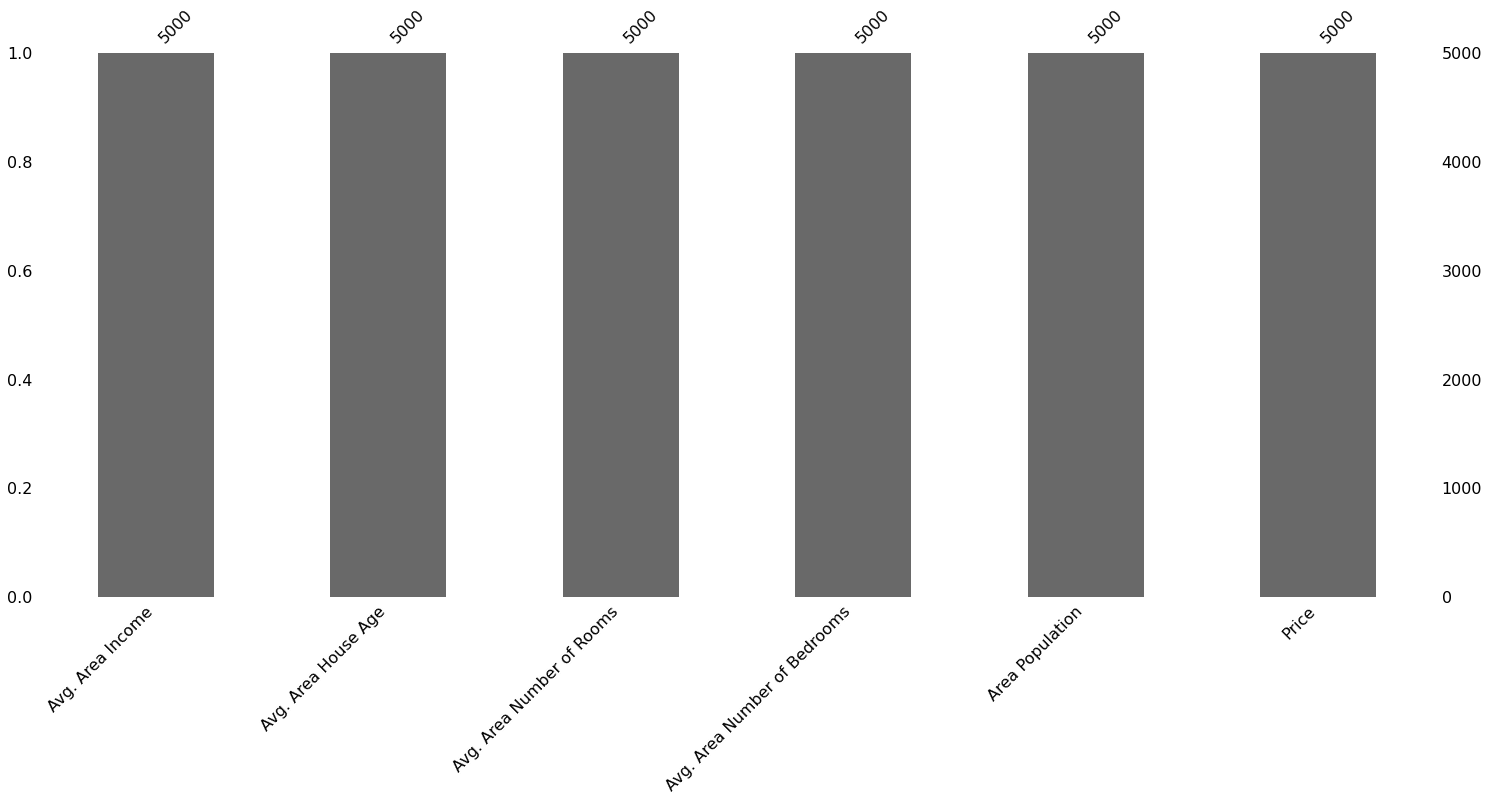

In [3]:
%%time
# check for missing values
msn.bar(df)

CPU times: user 65.2 ms, sys: 205 µs, total: 65.4 ms
Wall time: 64.8 ms


<AxesSubplot:>

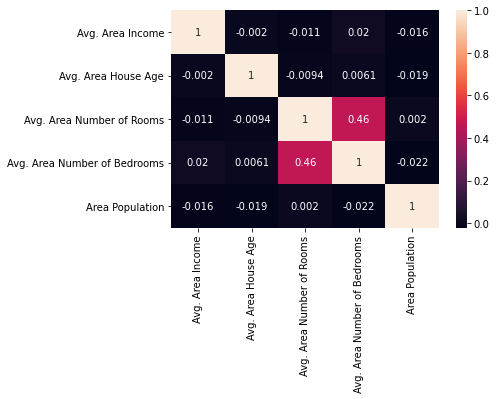

In [4]:
%%time
# check for relation between features
sns.heatmap(df.iloc[:,:5].corr(),annot=True)

In [5]:
%%time
# Standardize the data
X = df.iloc[:,:5]
y = df.iloc[:,5]

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(X_scaled)

[[ 1.02865969 -0.29692705  0.02127433  0.08806222 -1.31759867]
 [ 1.00080775  0.02590164 -0.25550611 -0.72230146  0.40399945]
 [-0.68462915 -0.11230283  1.5162435   0.93084045  0.07240989]
 ...
 [-0.48723454  1.28447022 -2.17026949 -1.50025059 -0.29193658]
 [-0.05459152 -0.44669439  0.14154061  1.18205319  0.65111608]
 [-0.28831272  0.01521477 -0.19434166  0.07185495  1.04162464]]
CPU times: user 21.2 ms, sys: 11.6 ms, total: 32.8 ms
Wall time: 32.4 ms


In [6]:
%%time
# add column of 1's at 0th index
X_new=np.insert(X_scaled,0,1,axis=1)
print(X_new)

[[ 1.          1.02865969 -0.29692705  0.02127433  0.08806222 -1.31759867]
 [ 1.          1.00080775  0.02590164 -0.25550611 -0.72230146  0.40399945]
 [ 1.         -0.68462915 -0.11230283  1.5162435   0.93084045  0.07240989]
 ...
 [ 1.         -0.48723454  1.28447022 -2.17026949 -1.50025059 -0.29193658]
 [ 1.         -0.05459152 -0.44669439  0.14154061  1.18205319  0.65111608]
 [ 1.         -0.28831272  0.01521477 -0.19434166  0.07185495  1.04162464]]
CPU times: user 549 µs, sys: 0 ns, total: 549 µs
Wall time: 470 µs


In [7]:
%%time
y = np.array(y)

CPU times: user 110 µs, sys: 0 ns, total: 110 µs
Wall time: 93.9 µs


In [8]:
%%time
# split the data in train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.30, random_state=42)

CPU times: user 58 ms, sys: 0 ns, total: 58 ms
Wall time: 57.7 ms


In [9]:
%%time
print(X_train, X_test, y_train, y_test)

[[ 1.         -1.25155908 -2.02901391  1.96206583  0.32306769  0.74505618]
 [ 1.         -0.58905082  0.51802457  0.65581093 -0.64126509  1.09858717]
 [ 1.          0.82222246 -0.5746743   1.24823096 -0.70609418 -0.95283943]
 ...
 [ 1.         -0.22405818  0.53537657 -0.37378791 -0.68178327  0.1133951 ]
 [ 1.         -0.92790309  1.4299047   2.26865538  0.27444587  1.39022039]
 [ 1.         -0.69631047 -0.08161155  0.88764104  1.6682714  -0.01308001]] [[ 1.         -0.62640165  1.04968821 -0.54441516 -0.59264327  0.77236229]
 [ 1.         -1.0718764   0.92402438 -0.06588201 -0.68988691  0.73590761]
 [ 1.          0.15085847  0.77452593 -0.32337135 -1.59749423 -0.70011282]
 ...
 [ 1.         -0.46145716  0.75843774  0.74091967 -0.44677781  0.79258814]
 [ 1.         -1.17381103  0.60473768 -0.02857245  0.33927496  2.81986196]
 [ 1.         -0.16974193 -0.50517233  1.06663869 -0.69799055 -1.24640865]] [ 881446.1155 1375771.129  1137069.307  ... 1318597.715  1708631.365
 1060897.689 ] [133

In [10]:
%%time
print(X_train.shape)

(3500, 6)
CPU times: user 39 µs, sys: 0 ns, total: 39 µs
Wall time: 31.7 µs


In [11]:
%%time
# checking r2_score using sklearn linear model
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)
y_predict=lr.predict(X_test)
from sklearn import metrics
print(metrics.r2_score(y_test,y_predict))

0.9146818498916267
CPU times: user 9.23 ms, sys: 3.61 ms, total: 12.8 ms
Wall time: 12.5 ms


## CUML

In [12]:
%%time

import cupy as cp
import cudf
import cuml
import seaborn as sns

CPU times: user 562 ms, sys: 95.7 ms, total: 657 ms
Wall time: 657 ms


In [13]:
%%time

df = cudf.read_csv('USA_Housing.csv')
df

CPU times: user 756 ms, sys: 344 ms, total: 1.1 s
Wall time: 1.14 s


,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05
...,...,...,...,...,...,...
4995,60567.94414,7.830362,6.137356,3.46,22837.36103,1.060194e+06
4996,78491.27543,6.999135,6.576763,4.02,25616.11549,1.482618e+06
4997,63390.68689,7.250591,4.805081,2.13,33266.14549,1.030730e+06
4998,68001.33124,5.534388,7.130144,5.44,42625.62016,1.198657e+06


In [14]:
%%time

# check for missing values
df.isnull().values.any()

CPU times: user 103 ms, sys: 0 ns, total: 103 ms
Wall time: 102 ms


array(False)

In [15]:
%%time

df.isnull().sum()

CPU times: user 5 ms, sys: 227 µs, total: 5.22 ms
Wall time: 4.78 ms


Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
dtype: uint64

CPU times: user 488 ms, sys: 223 ms, total: 711 ms
Wall time: 711 ms


<AxesSubplot:>

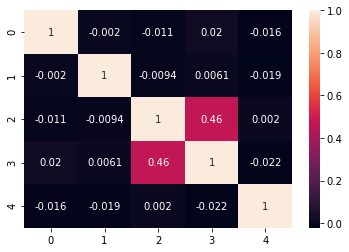

In [16]:
%%time

# check for relation between features
sns.heatmap(df.iloc[:,:5].corr().as_gpu_matrix(), annot=True)

In [17]:
%%time

X = df.iloc[:,:5]
y = df.iloc[:,5]

CPU times: user 2.37 ms, sys: 271 µs, total: 2.64 ms
Wall time: 2.35 ms


In [18]:
%%time

from cuml.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(X_scaled)

             0         1         2         3         4
0     1.028660 -0.296927  0.021274  0.088062 -1.317599
1     1.000808  0.025902 -0.255506 -0.722301  0.403999
2    -0.684629 -0.112303  1.516243  0.930840  0.072410
3    -0.491499  1.221572 -1.393077 -0.584540 -0.186734
4    -0.807073 -0.944834  0.846742  0.201513 -0.988387
...        ...       ...       ...       ...       ...
4995 -0.752109  1.869297 -0.845588 -0.422467 -1.342732
4996  0.929740  1.030822 -0.408686  0.031337 -1.062747
4997 -0.487235  1.284470 -2.170269 -1.500251 -0.291937
4998 -0.054592 -0.446694  0.141541  1.182053  0.651116
4999 -0.288313  0.015215 -0.194342  0.071855  1.041625

[5000 rows x 5 columns]
CPU times: user 39.9 ms, sys: 0 ns, total: 39.9 ms
Wall time: 39.4 ms


In [19]:
%%time

# add column of 1's at 0th index
ones = cp.ones((X_scaled.shape[0], 1))
X_new = cp.hstack((ones, X_scaled.as_matrix()))
print(X_new)

[[ 1.          1.02865969 -0.29692705  0.02127433  0.08806222 -1.31759867]
 [ 1.          1.00080775  0.02590164 -0.25550611 -0.72230146  0.40399945]
 [ 1.         -0.68462915 -0.11230283  1.5162435   0.93084045  0.07240989]
 ...
 [ 1.         -0.48723454  1.28447022 -2.17026949 -1.50025059 -0.29193658]
 [ 1.         -0.05459152 -0.44669439  0.14154061  1.18205319  0.65111608]
 [ 1.         -0.28831272  0.01521477 -0.19434166  0.07185495  1.04162464]]
CPU times: user 792 µs, sys: 3.84 ms, total: 4.63 ms
Wall time: 4.19 ms


In [20]:
%%time

y = cp.array(y)
print(y)

[1059033.558 1505890.915 1058987.988 ... 1030729.583 1198656.872
 1298950.48 ]
CPU times: user 0 ns, sys: 882 µs, total: 882 µs
Wall time: 602 µs


In [21]:
%%time

# split the data in train and test
from cuml.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.30, random_state=42)

CPU times: user 10.4 ms, sys: 8.61 ms, total: 19 ms
Wall time: 18.6 ms


In [22]:
%%time

print(X_train, X_test)

[[ 1.         -0.2332274  -2.01514277 -0.83125522  0.16909859  0.13139801]
 [ 1.          1.58955623  0.04393703  2.02471761  0.31496405  1.319374  ]
 [ 1.          0.23245889 -0.26063572  0.23359867  0.29065314 -0.13591708]
 ...
 [ 1.         -0.26779644  0.26283629 -0.12659151 -0.69799055 -1.06700526]
 [ 1.         -1.63951368  0.0921311  -0.08063389 -1.5245615   0.2261797 ]
 [ 1.          0.41890289  0.48530716  0.52781847  1.6682714   1.09726134]] [[ 1.         -1.8225524  -0.9068761   0.99912556  1.74120413 -0.78398769]
 [ 1.          0.12442329  0.46130467  1.30603128  0.05564767  0.32077879]
 [ 1.          1.3186008   0.43065161  0.08064143  2.02483141 -0.24114399]
 ...
 [ 1.         -0.65013218 -1.861131    1.80936295  1.8465514   0.57896078]
 [ 1.         -0.2824124   0.0850448   2.09107241 -0.44677781  2.21991953]
 [ 1.          0.25711273 -0.03854788 -2.4989307  -1.35438513 -0.74236929]]
CPU times: user 1.9 ms, sys: 0 ns, total: 1.9 ms
Wall time: 1.38 ms


In [23]:
%%time

print(y_train, y_test)

[ 762167.2533 2009937.703  1260241.396  ... 1197073.445   882170.3184
 1703880.22  ] [ 585440.4314 1576286.214  1480227.547  ... 1131532.919  1723397.089
  825095.1086]
CPU times: user 647 µs, sys: 0 ns, total: 647 µs
Wall time: 455 µs


In [24]:
%%time

# checking r2_score using cuml linear model
from cuml.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)
y_predict=lr.predict(X_test)


from cuml import metrics
print(metrics.r2_score(y_test,y_predict))

0.9206040544405539
CPU times: user 520 ms, sys: 136 ms, total: 656 ms
Wall time: 655 ms
